In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pickle
import feather
import os
import matplotlib.pyplot as plt
import re
import string

# matplotlib style
plt.style.use('fivethirtyeight')
# options, figure size:
plt.rcParams['figure.figsize'] = [20, 10]
# get rid of margins:
plt.rcParams['axes.xmargin'] = 0

dataset = input()
path = os.getcwd() +'/Datasets/'+dataset+'/'

banks


In [2]:
df = pd.read_feather(path+dataset+'_full.ftr')

## 1) Additional cleaning for the VADER sentiment analysis
Key difference in this cleaning step is to not remove special characters, because emojis also give sentiment to the tweet and becomes important in the sentiment analysis.

In [3]:
def clean_text_vader1(text):
    """Initial cleaning I make to the dataset"""
    text = re.sub(r'@[A-Za-z0-9]+','',text) #Removes @mentions
    text = re.sub(r'#','',text) #Removes the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) #Removing RT
    text = re.sub(r'&amp;','',text) #Removes &amp
    text = re.sub(r'https?:\/\/\S+','',text) #Remove the hyper link
    text = re.sub(r'\n','',text) #remove the new line symbol
    text = re.sub(r'\t','',text) #remove the tab symbol
    #Removes the punctuation:
    text = re.sub('\w*\d\w*', '', text) #remove words containing numbers
    text = re.sub(' +', ' ', text).strip() #Removes trailing white spaces
    text = text.lower() # lowers the text
    
    text = re.sub(r"(.)\1{2,}",r"\1", text) # Replace triple+ characters with single char

    return text

In [4]:
df['text'] = df['text'].apply(clean_text_vader1)

## 2) Sentiment Analysis

In [5]:
analyzer = SentimentIntensityAnalyzer()

# Create a function to get the VADER polarity
def getPolarityVADER(text):
    score = analyzer.polarity_scores(text)
    polarity = score['compound']
    return polarity

In [6]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <= -0.05:
        return 'Negative'
    elif score >= 0.05:
        return 'Positive'
    else:
        return 'Neutral'

# Save the positive, neutral and negative values
def polarity(df):
    postweets = df[df.analysis == 'Positive'].shape[0]
    negtweets = df[df.analysis == 'Negative'].shape[0]
    neutweets = df[df.analysis == 'Neutral'].shape[0]
    total = df.shape[0]
    
    print('Share of positive tweets:', 
      round((postweets/total)*100, 1))
    print('Share of negative tweets:', 
      round((negtweets/total)*100, 1))
    print('Share of neutral tweets:', 
      round((neutweets/total)*100, 1))
    
    return postweets, negtweets, neutweets, total

In [7]:
df['sentiment'] = df['text'].apply(getPolarityVADER)

In [8]:
df['analysis'] = df['sentiment'].apply(getAnalysis)

## 3) Sentiment for tweets in the fintech dataset

In [23]:
print('Fintech related tweets: \n')
polarity(df)

Fintech related tweets: 

Share of positive tweets: 50.4
Share of negative tweets: 8.9
Share of neutral tweets: 40.7


(1742759, 306488, 1408815, 3458062)

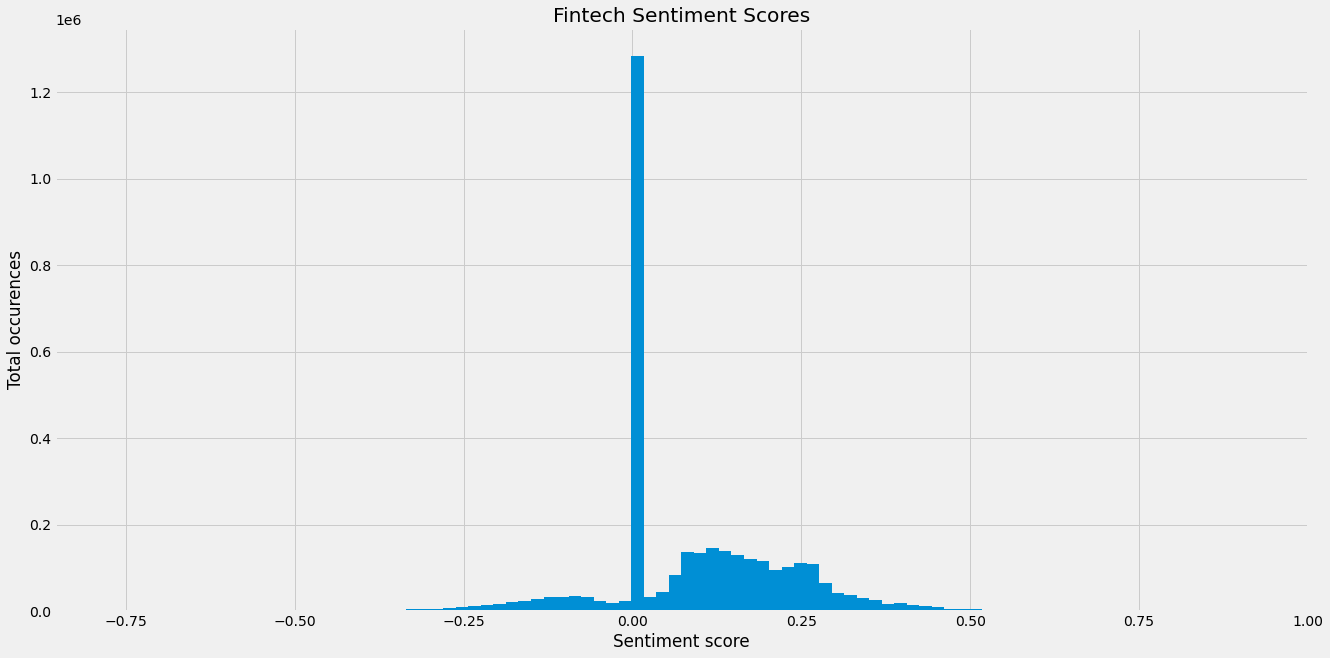

In [24]:
plt.hist(df.sentiment, bins = 100)

plt.xlabel('Sentiment score')
plt.ylabel('Total occurences')
plt.title('Fintech Sentiment Scores')

plt.savefig(path+dataset+'_sentiment.pdf')
plt.show()

## 4) Sentiment for tweets in the banking dataset

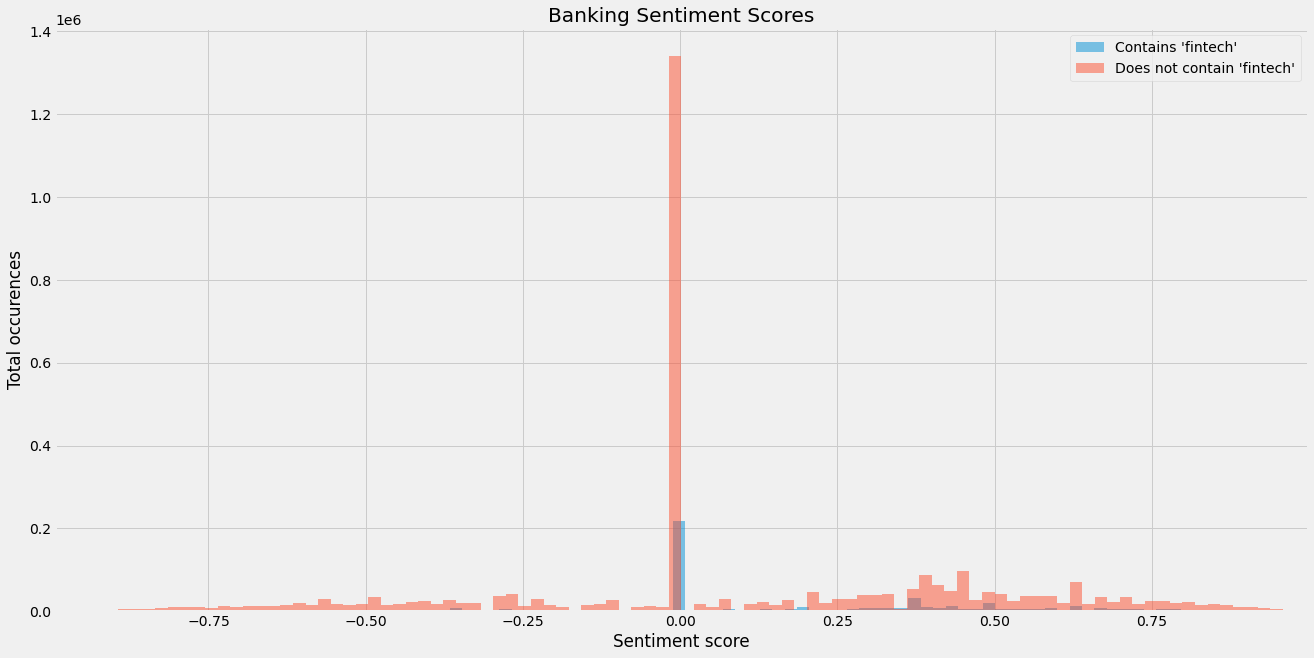

In [9]:
plt.hist(df[df.fintech==True].sentiment, bins = 100, alpha=0.5, label="Contains 'fintech'")
plt.hist(df[df.fintech==False].sentiment, bins = 100, alpha=0.5, label="Does not contain 'fintech'")

plt.xlabel('Sentiment score')
plt.ylabel('Total occurences')
plt.title('Banking Sentiment Scores')
plt.legend()

plt.savefig(path+dataset+'_sentiment.pdf')
plt.show()

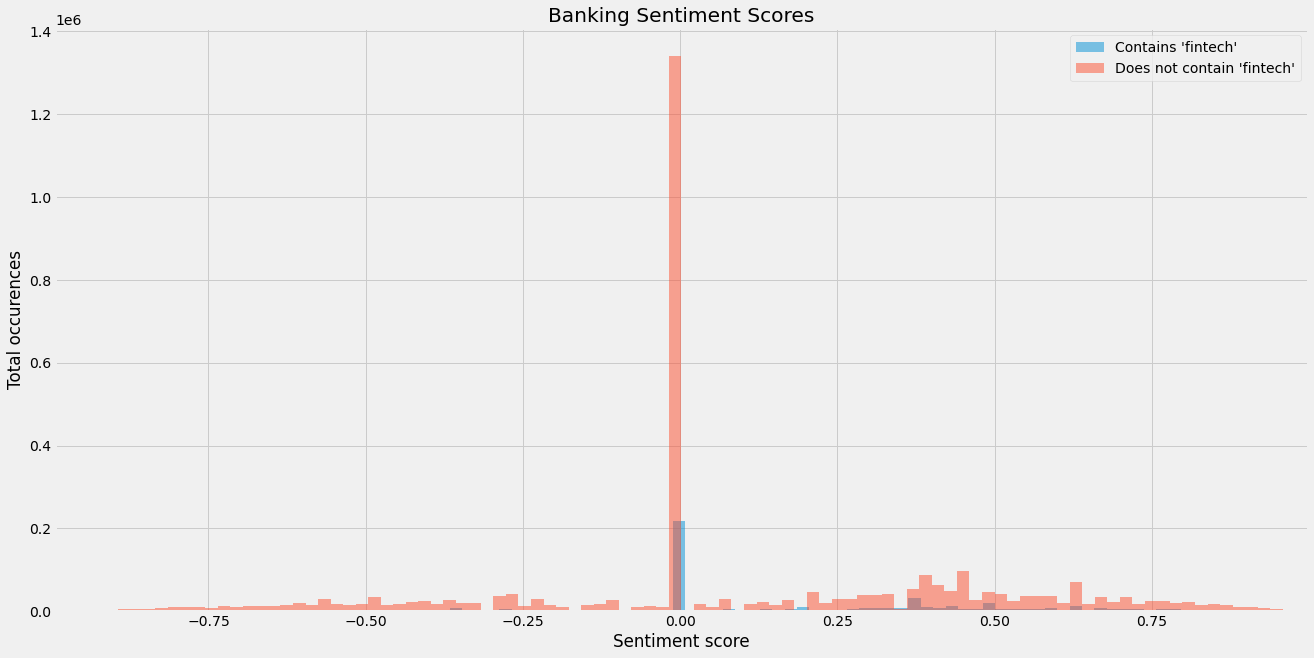

In [10]:
plt.hist(df[df.fintech==True].sentiment, bins = 100, alpha=0.5, label="Contains 'fintech'")
plt.hist(df[df.fintech==False].sentiment, bins = 100, alpha=0.5, label="Does not contain 'fintech'")

plt.xlabel('Sentiment score')
plt.ylabel('Total occurences')
plt.title('Banking Sentiment Scores')
plt.legend()

plt.savefig(path+dataset+'_sentiment.png')
plt.show()

In [11]:
print('For tweets associated with fintech: \n')
polarity(df[df.fintech==True])

For tweets associated with fintech: 

Share of positive tweets: 48.3
Share of negative tweets: 11.9
Share of neutral tweets: 39.8


(273137, 67350, 224717, 565204)

In [12]:
print('Banking tweets not associated with fintech: \n')
polarity(df[df.fintech==False])

Banking tweets not associated with fintech: 

Share of positive tweets: 39.8
Share of negative tweets: 20.5
Share of neutral tweets: 39.7


(1373940, 706893, 1372764, 3453597)

In [13]:
# Overwrite the clean dataframe:
df.to_csv(path+dataset+'_clean.csv')
df.to_feather(path+dataset+'_clean.ftr')